A simple function to count the number of occurrences with different approaches to random shuffling.  One bad and the other is Fisher Yates.

In [3]:
import random
import numpy as np

def swap(lst, ind1, ind2):
    temp = lst[ind1]
    lst[ind1] = lst[ind2]
    lst[ind2] = temp

def unfairShuffle(lst):
    for i, el in enumerate(lst):
        randomIndex = random.randint(0, len(lst) - 1) #for some reason it's inclusive
        swap(lst, i, randomIndex)
    return lst

def fisherYates(lst):
    for i in range(len(lst) - 1, 0, -1):
        randomIndex = random.randint(0, i)
        swap(lst, i, randomIndex)
    return lst

def trial_matrix(lst, func, numberOfTrials):
    #setup a matrix to hold results
    matrix = np.zeros(shape=(len(lst), len(lst)))
    #run the trials
    for i in range(numberOfTrials):
        result = func(lst[:])
        for j, number in enumerate(result):
            matrix[number - 1][j] += 1
    return matrix

lst = range(1, 21) #numbers 1 to 20
unfair = trial_matrix(lst, unfairShuffle, 1000000) #run for a million
yates = trial_matrix(lst, fisherYates, 1000000)

In [4]:
import matplotlib.pyplot as plt

numberOfBins = len(lst)
indices = np.arange(numberOfBins)

def form_chart(matrix):
    plt.bar(indices, matrix[0], label="1")
    y_buildup = matrix[0][:]

    for i in range(1, numberOfBins):
        plt.bar(indices, matrix[i], bottom=y_buildup, label="{}".format(i + 1))
        for j in range(0, numberOfBins):
            y_buildup[j] += matrix[i][j]

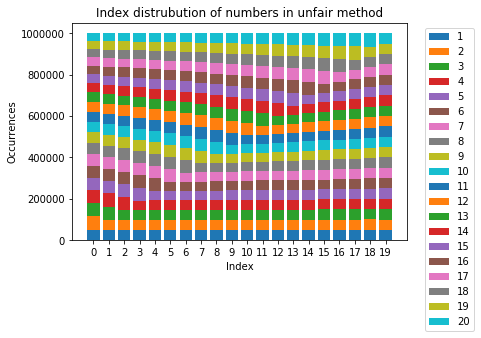

In [5]:
form_chart(unfair)
plt.ylabel('Occurrences')
plt.xlabel('Index')
plt.title('Index distrubution of numbers in unfair method')
plt.xticks(indices, range(numberOfBins))
plt.legend(bbox_to_anchor=(1.04, 1))
plt.savefig('unfair.png')
plt.show()

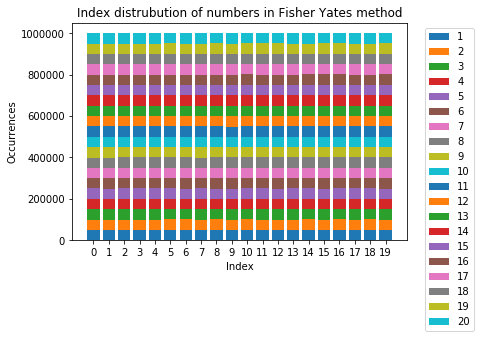

In [6]:
form_chart(yates)
plt.ylabel('Occurrences')
plt.xlabel('Index')
plt.title('Index distrubution of numbers in Fisher Yates method')
plt.xticks(indices, range(numberOfBins))
plt.legend(bbox_to_anchor=(1.04, 1))
plt.savefig('yates.png')
plt.show()